In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from modules.Utils import load_cifar10, load_cifar100
from modules.KerasCnnWithSpectralPool import CNN_Spectral_Pool
# from keras.models import load_model
import logging
tf.get_logger().setLevel(logging.ERROR)

%matplotlib inline

# Loading CIFAR-100 data

In [2]:
xtrain, ytrain, xtest, ytest = load_cifar100(get_test_data=True, channels_last=False)
xtrain = np.moveaxis(xtrain, 1, -1)
print(xtrain.shape)
xtest = np.moveaxis(xtest, 1, -1)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
print(max(ytrain)-min(ytrain))

file already downloaded..
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)
99


In [3]:
sample_size = 2 ** 14
validation_size = 2 ** 10
# Randomly sample the x train data and y train data-------------------------------------------------------------------
random_sample = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_random_sampled = xtrain[random_sample]
ytrain_random_sampled = ytrain[random_sample]
# Separate them to train sample and validation sample-----------------------------------------------------------------
# For train
xtrain_sample = xtrain_random_sampled[:-validation_size]
ytrain_sample = ytrain_random_sampled[:-validation_size]
# For validation
xvalid_sample = xtrain_random_sampled[-validation_size:]
yvalid_sample = ytrain_random_sampled[-validation_size:]

# Result from manual tuning

In [21]:
M = 6
l2_norm = 1e-5
epsilon = 1e-7
learning_rate = 1e-7
num_classes = 100
epochs = 100

In [22]:
# Build the model-------------------------------------------------------------------------------------------------
    model1 = CNN_Spectral_Pool(M=M,l2_norm=l2_norm, num_classes=100)
    for layer in model1.layers:
        layer.trainable = True
    # Instantiate hyperparameters-------------------------------------------------------------------------------------
    # Instantiate an optimizer
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=epsilon)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Instantiate a training accuracy metric
    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Instantiate a validation accuracy metric
    val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Compile the model-----------------------------------------------------------------------------------------------
    # model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
    model1.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
    # Fit the model---------------------------------------------------------------------------------------------------
    history1 = model1.fit(xtrain_sample, tf.one_hot(indices=ytrain_sample, depth=num_classes), validation_data=(xvalid_sample, tf.one_hot(indices=yvalid_sample, depth=num_classes)), batch_size=256, epochs=epochs, verbose=1)
    
    # Record best performances----------------------------------------------------------------------------------------
    train_loss=history1.history['loss']
    val_loss=history1.history['val_loss']
    best_train_accuracies = []
    best_valid_accuracies = []
    train_acc=history1.history['accuracy']
    valid_acc=history1.history['val_accuracy']
    best_train_accuracies.append(np.max(train_acc))
    best_valid_accuracies.append(np.max(valid_acc))
#     # Calculate time used per search round
#     end_time=time.time()
#     time_taken = "%.2f" % (end_time-start_time)
    # Print one round search result
    #print('No.{0} hyperparameters search finished!!!, it takes {1} seconds'.format(search_idx+1, time_taken))
    print('Current Best Train Accuracy: ', np.max(best_train_accuracies))
    print('Current Best Valid Accuracy: ', np.max(best_valid_accuracies))
    #print('Current Best Hyperparameters: ', [best_train_accuracies.index(np.max(best_train_accuracies))])

Epoch 1/100
60/60 [==============================] - 1s 10ms/step - loss: 4.7210 - accuracy: 0.0084 - val_loss: 4.7192 - val_accuracy: 0.0098
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 4.7120 - accuracy: 0.0065 - val_loss: 4.7136 - val_accuracy: 0.0098
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 4.7135 - accuracy: 0.0067 - val_loss: 4.7083 - val_accuracy: 0.0078
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 4.7042 - accuracy: 0.0058 - val_loss: 4.7034 - val_accuracy: 0.0078
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 4.7019 - accuracy: 0.0060 - val_loss: 4.6989 - val_accuracy: 0.0068
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 4.6949 - accuracy: 0.0064 - val_loss: 4.6946 - val_accuracy: 0.0078
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 4.6915 - accuracy: 0.0072 - val_loss: 4.6905 - val_accuracy: 0.0088
Epoch 8/100


Epoch 59/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5950 - accuracy: 0.0177 - val_loss: 4.6042 - val_accuracy: 0.0166
Epoch 60/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5912 - accuracy: 0.0181 - val_loss: 4.6035 - val_accuracy: 0.0156
Epoch 61/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5906 - accuracy: 0.0166 - val_loss: 4.6027 - val_accuracy: 0.0156
Epoch 62/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5897 - accuracy: 0.0172 - val_loss: 4.6020 - val_accuracy: 0.0166
Epoch 63/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5864 - accuracy: 0.0186 - val_loss: 4.6013 - val_accuracy: 0.0166
Epoch 64/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5888 - accuracy: 0.0180 - val_loss: 4.6006 - val_accuracy: 0.0166
Epoch 65/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5857 - accuracy: 0.0219 - val_loss: 4.6000 - val_accuracy: 0.0166
Epoch 

In [23]:
from tensorflow.keras import Model

In [24]:
model1.save_weights(filepath = "./model/100_model1")

In [7]:
loaded_model1 = CNN_Spectral_Pool(M=M,l2_norm=l2_norm,num_classes = 100)
loaded_model1.load_weights(filepath = "./model/100_model1")

# Models with optimal parameters from hyperparameters searching

### 1. Spectral = True

In [8]:
# M2 = 8
# l2_norm2 = 0.00139
# epsilon2 = 4.12e-8
# learning_rate2 = 4.7e-5
#num_classes = 100
#epochs = 100

In [34]:
# M2 =  5
# l2_norm2 =  0.008876319699561855
# epsilon2 = 1.3671830458691414e-07
# learning_rate2 = 7.047784936608665e-06
# num_classes = 100
# epochs = 100

In [6]:
M2 =  4
l2_norm2 =  0.005
epsilon2 =   7.5e-06
learning_rate2 = 3.9e-05
num_classes = 100
epochs = 100

In [7]:
# Build the model-------------------------------------------------------------------------------------------------
    model2 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2,num_classes = 100)
    for layer in model2.layers:
        layer.trainable = True
    # Instantiate hyperparameters-------------------------------------------------------------------------------------
    # Instantiate an optimizer
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate2, beta_1=0.9, beta_2=0.999, epsilon=epsilon2)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Instantiate a training accuracy metric
    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Instantiate a validation accuracy metric
    val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Compile the model-----------------------------------------------------------------------------------------------
    # model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
    model2.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
    # Fit the model---------------------------------------------------------------------------------------------------
    history2 = model2.fit(xtrain_sample, tf.one_hot(indices=ytrain_sample, depth=num_classes), validation_data=(xvalid_sample, tf.one_hot(indices=yvalid_sample, depth=num_classes)), batch_size=256, epochs=epochs, verbose=1)
    
    # Record best performances----------------------------------------------------------------------------------------
    train_loss=history2.history['loss']
    val_loss=history2.history['val_loss']
    best_train_accuracies = []
    best_valid_accuracies = []
    train_acc=history2.history['accuracy']
    valid_acc=history2.history['val_accuracy']
    best_train_accuracies.append(np.max(train_acc))
    best_valid_accuracies.append(np.max(valid_acc))
#     # Calculate time used per search round
#     end_time=time.time()
#     time_taken = "%.2f" % (end_time-start_time)
    # Print one round search result
    #print('No.{0} hyperparameters search finished!!!, it takes {1} seconds'.format(search_idx+1, time_taken))
    print('Current Best Train Accuracy: ', np.max(best_train_accuracies))
    print('Current Best Valid Accuracy: ', np.max(best_valid_accuracies))

Epoch 1/100
60/60 [==============================] - 1s 9ms/step - loss: 5.0251 - accuracy: 0.0172 - val_loss: 4.5975 - val_accuracy: 0.0381
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 4.5871 - accuracy: 0.0510 - val_loss: 4.5817 - val_accuracy: 0.0449
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5606 - accuracy: 0.0614 - val_loss: 4.5639 - val_accuracy: 0.0537
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5335 - accuracy: 0.0738 - val_loss: 4.5477 - val_accuracy: 0.0576
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5060 - accuracy: 0.0827 - val_loss: 4.5326 - val_accuracy: 0.0664
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 4.4845 - accuracy: 0.0878 - val_loss: 4.5137 - val_accuracy: 0.0781
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 4.4620 - accuracy: 0.0944 - val_loss: 4.4992 - val_accuracy: 0.0947
Epoch 8/100
6

Epoch 59/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7645 - accuracy: 0.3277 - val_loss: 4.1910 - val_accuracy: 0.1729
Epoch 60/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7463 - accuracy: 0.3404 - val_loss: 4.1949 - val_accuracy: 0.1836
Epoch 61/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7429 - accuracy: 0.3400 - val_loss: 4.1853 - val_accuracy: 0.1787
Epoch 62/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7349 - accuracy: 0.3476 - val_loss: 4.1891 - val_accuracy: 0.1768
Epoch 63/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7356 - accuracy: 0.3468 - val_loss: 4.1820 - val_accuracy: 0.1855
Epoch 64/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7048 - accuracy: 0.3548 - val_loss: 4.1867 - val_accuracy: 0.1807
Epoch 65/100
60/60 [==============================] - 0s 4ms/step - loss: 3.7161 - accuracy: 0.3522 - val_loss: 4.1843 - val_accuracy: 0.1826
Epoch 

In [18]:
model2.save_weights(filepath = "./model/100_model2")

In [ ]:
loaded_model2 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2,num_classes = 100)
loaded_model2.load_weights(filepath = "./model/100_model2")

### 2. Spectral = False

In [12]:
# Build the model-------------------------------------------------------------------------------------------------
    model3 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2,num_classes = 100,use_parameterization = False)
    for layer in model3.layers:
        layer.trainable = True
    # Instantiate hyperparameters-------------------------------------------------------------------------------------
    # Instantiate an optimizer
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate2, beta_1=0.9, beta_2=0.999, epsilon=epsilon2)
    # Instantiate a loss function.
    loss_fn = tf.keras.losses.CategoricalCrossentropy()
    # Instantiate a training accuracy metric
    train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Instantiate a validation accuracy metric
    val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    # Compile the model-----------------------------------------------------------------------------------------------
    # model.compile(optimizer=sgd, loss=loss_fn, metrics=train_acc_metric)
    model3.compile(optimizer=adam, loss=loss_fn, metrics=['accuracy'])
    # Fit the model---------------------------------------------------------------------------------------------------
    history3 = model3.fit(xtrain_sample, tf.one_hot(indices=ytrain_sample, depth=num_classes), validation_data=(xvalid_sample, tf.one_hot(indices=yvalid_sample, depth=num_classes)), batch_size=256, epochs=epochs, verbose=1)
    
    # Record best performances----------------------------------------------------------------------------------------
    #train_loss=history.history['loss']
    #val_loss=history.history['val_loss']
    best_train_accuracies = []
    best_valid_accuracies = []
    train_acc=history3.history['accuracy']
    valid_acc=history3.history['val_accuracy']
    best_train_accuracies.append(np.max(train_acc))
    best_valid_accuracies.append(np.max(valid_acc))
#     # Calculate time used per search round
#     end_time=time.time()
#     time_taken = "%.2f" % (end_time-start_time)
    # Print one round search result
    #print('No.{0} hyperparameters search finished!!!, it takes {1} seconds'.format(search_idx+1, time_taken))
    print('Current Best Train Accuracy: ', np.max(best_train_accuracies))
    print('Current Best Valid Accuracy: ', np.max(best_valid_accuracies))

Epoch 1/100
60/60 [==============================] - 1s 10ms/step - loss: 5.4638 - accuracy: 0.0105 - val_loss: 4.7810 - val_accuracy: 0.0176
Epoch 2/100
60/60 [==============================] - 0s 5ms/step - loss: 4.7302 - accuracy: 0.0222 - val_loss: 4.6428 - val_accuracy: 0.0283
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 4.6320 - accuracy: 0.0331 - val_loss: 4.6139 - val_accuracy: 0.0283
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 4.6025 - accuracy: 0.0425 - val_loss: 4.6020 - val_accuracy: 0.0400
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5896 - accuracy: 0.0514 - val_loss: 4.5947 - val_accuracy: 0.0410
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5806 - accuracy: 0.0598 - val_loss: 4.5885 - val_accuracy: 0.0430
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 4.5712 - accuracy: 0.0614 - val_loss: 4.5830 - val_accuracy: 0.0508
Epoch 8/100


Epoch 59/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2471 - accuracy: 0.1808 - val_loss: 4.3905 - val_accuracy: 0.1162
Epoch 60/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2403 - accuracy: 0.1799 - val_loss: 4.3889 - val_accuracy: 0.1201
Epoch 61/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2347 - accuracy: 0.1813 - val_loss: 4.3872 - val_accuracy: 0.1152
Epoch 62/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2306 - accuracy: 0.1852 - val_loss: 4.3836 - val_accuracy: 0.1182
Epoch 63/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2283 - accuracy: 0.1835 - val_loss: 4.3816 - val_accuracy: 0.1182
Epoch 64/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2237 - accuracy: 0.1888 - val_loss: 4.3785 - val_accuracy: 0.1182
Epoch 65/100
60/60 [==============================] - 0s 4ms/step - loss: 4.2166 - accuracy: 0.1879 - val_loss: 4.3774 - val_accuracy: 0.1162
Epoch 

In [21]:
#model3.save_weights(filepath = "./model/100_model3")

In [ ]:
loaded_model3 = CNN_Spectral_Pool(M=M2,l2_norm=l2_norm2,num_classes = 100,use_spectral_parameterization = False)
loaded_model3.load_weights(filepath = "./model/100_model3")

### Test

In [10]:
results = model2.evaluate(xtest, tf.one_hot(indices=ytest, depth=num_classes), batch_size=256)

40/40 [==============================] - 0s 4ms/step - loss: 4.1005 - accuracy: 0.2057


## Plot

### Training and validation plot

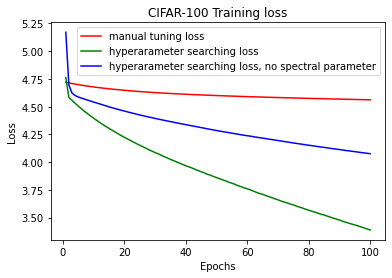

In [25]:
# loss plot
loss_train1 = history1.history['loss']
loss_train2 = history2.history['loss']
loss_train3 = history3.history['loss']

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_train1, 'r', label='manual tuning loss')
plt.plot(total_epochs, loss_train2, 'g', label='hyperarameter searching loss')
plt.plot(total_epochs, loss_train3, 'b', label='hyperarameter searching loss, no spectral parameter')
plt.title('CIFAR-100 Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

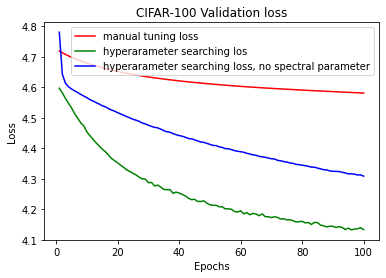

In [26]:
loss_val1 = history1.history['val_loss']
loss_val2 = history2.history['val_loss']
loss_val3 = history3.history['val_loss']

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_val1, 'r', label='manual tuning loss')
plt.plot(total_epochs, loss_val2, 'g', label='hyperarameter searching los')
plt.plot(total_epochs, loss_val3, 'b', label='hyperarameter searching loss, no spectral parameter')
plt.title('CIFAR-100 Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Comparison plot

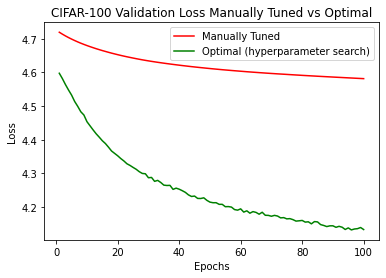

In [27]:
# manually tuned vs optimal
total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_val1, 'r', label='Manually Tuned')
plt.plot(total_epochs, loss_val2, 'g', label='Optimal (hyperparameter search)')
plt.title('CIFAR-100 Validation Loss Manually Tuned vs Optimal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

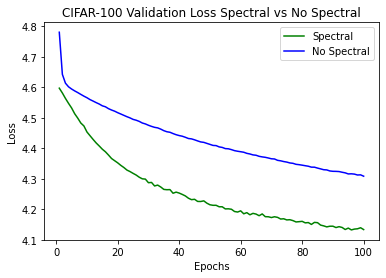

In [28]:
# spectral vs no spectral, both optimal

total_epochs = range(1,epochs+1)
plt.plot(total_epochs, loss_val2, 'g', label='Spectral')
plt.plot(total_epochs, loss_val3, 'b', label='No Spectral')
plt.title('CIFAR-100 Validation Loss Spectral vs No Spectral')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
import csv
import pandas as pd

In [30]:
df = pd.DataFrame(loss_train2)
df.to_csv('c100.csv')